# Project 7 -- Aarav Mohanty

## Question 1

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/anvil/projects/tdm/data/death_records/DeathRecords.csv")
bins = [-float('inf'), 18, 25, 35, 55, 150, float('inf')]
# split into labels
labels = ["youth", "young adult", "adult", "middle age", "senior", "unknown"]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
# sort it based on value_counts
age_counts_default = pd.cut(df['Age'], bins=bins).value_counts().sort_index()
print(age_counts_default)
#Count occurrences in each bin that was created

Age
(-inf, 18.0]       36033
(18.0, 25.0]       27691
(25.0, 35.0]       49540
(35.0, 55.0]      271181
(55.0, 150.0]    2246155
(150.0, inf]         571
Name: count, dtype: int64


In [3]:
age_counts_labeled = df['Age Group'].value_counts().sort_index()
print(age_counts_labeled)
#Count occurrences with category labels

Age Group
youth            36033
young adult      27691
adult            49540
middle age      271181
senior         2246155
unknown            571
Name: count, dtype: int64


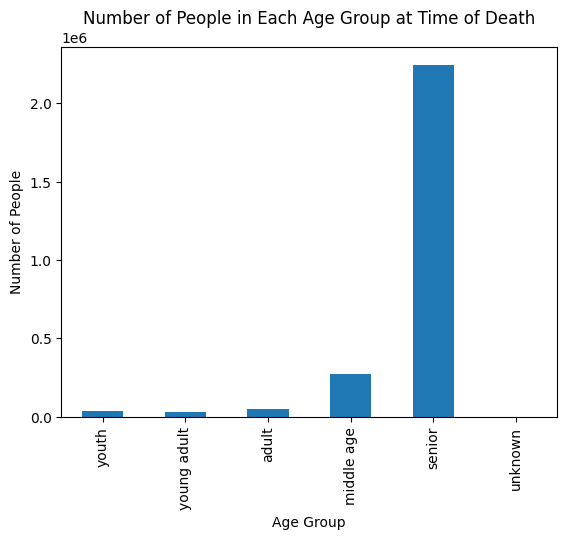

In [ ]:
age_counts_labeled.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.title("Number of People in Each Age Group at Time of Death")
plt.show()
#plot all of the information as shown below

Markdown notes and sentences and analysis written here.

## Question 2

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation

# Load the transaction data into a DataFrame
df = pd.read_csv("/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv")

# Assign column names to the DataFrame for easier reference
df.columns = [
    "BASKET_NUM",  # Unique identifier for each shopping basket
    "HSHD_NUM",    # Household number
    "PURCHASE",     # Date of purchase
    "PRODUCT_NUM",  # Product identification number
    "SPEND",        # Amount spent in dollars
    "UNITS",        # Number of units purchased
    "STORE_R",      # Store region identifier
    "WEEK_NUM",     # Week number within the year
    "YEAR"          # Year of purchase
]

# Group the data by 'STORE_R' and 'YEAR', then calculate the total amount spent for each combination
df.groupby(['STORE_R', 'YEAR'])['SPEND'].sum()

# This results in the total amount spent (`SPEND`) aggregated by the 
# 8 possible combinations of 'YEAR' and 'STORE_R' values.


STORE_R  YEAR
CENTRAL  2016    4471800.64
         2017    4425504.50
EAST     2016    5829165.51
         2017    5870281.35
SOUTH    2016    3996750.91
         2017    3961169.86
WEST     2016    4754002.95
         2017    4926103.59
Name: SPEND, dtype: float64

Markdown notes and sentences and analysis written here.

## Question 3

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation

# Read the CSV file containing beer reviews data
df = pd.read_csv("/anvil/projects/tdm/data/beer/reviews_sample.csv")

# Extract the year from the 'date' column and create a new 'year' column
df["year"] = pd.to_datetime(df['date']).dt.year

# Extract the month from the 'date' column and create a new 'month' column
df["month"] = pd.to_datetime(df['date']).dt.month

# Group the data by 'month' and 'year', then calculate the mean 'score' for each group
df.groupby(['month', 'year'])['score'].mean()


month  year
1      1998    3.770000
       2001    4.220000
       2002    4.246667
       2003    3.842596
       2004    3.892104
                 ...   
12     2013    3.885565
       2014    3.967668
       2015    3.993312
       2016    4.010456
       2017    4.045614
Name: score, Length: 238, dtype: float64

Markdown notes and sentences and analysis written here.

## Question 4

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation

# Read the text file containing election data with no header, using '|' as a separator
df = pd.read_csv("/anvil/projects/tdm/data/election/itcont1980.txt", header=None, sep='|')

# Assign column names to the DataFrame for easier reference
df.columns = [
    "CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", 
    "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", 
    "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", 
    "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID"
]

# Filter the DataFrame to include only rows where the 'STATE' column is 'IN' (Indiana)
indianaDF = df[df["STATE"] == "IN"]

# Count the number of donations made from each city in Indiana
# Sort the counts in descending order and display the top 41 cities
indianaDF["CITY"].value_counts().sort_values(ascending=False).head(41)


CITY
INDIANAPOLIS      1443
MUNCIE             232
CARMEL             167
FORT WAYNE         157
EVANSVILLE         151
FT WAYNE           132
ELKHART            132
SOUTH BEND         123
INDPLS             123
LAFAYETTE           85
TERRE HAUTE         75
LAPORTE             53
ZIONSVILLE          52
GARY                47
MERRILLVILLE        46
COLUMBUS            45
KOKOMO              45
RICHMOND            43
BLOOMINGTON         38
GREENWOOD           35
CROWN POINT         35
VALPARAISO          34
ANDERSON            34
MUNICE              31
MUNSTER             30
WABASH              27
WEST LAFAYETTE      24
SYRACUSE            24
NOBLESVILLE         22
W LAFAYETTE         22
HAMMOND             22
WARSAW              21
VINCENNES           20
HOBART              17
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
CHESTERTON          15
WALKERTON           15
PLAINFIELD          15
INDIANPOLIS         15
Name: count, dtype: int64

In [ ]:
# Filter the DataFrame directly using indexing to include only rows where 'STATE' is 'IN'
# Count the number of donations made from each city
# Sort the counts in descending order and display the top 41 cities
df[df["STATE"] == "IN"]["CITY"].value_counts().sort_values(ascending=False).head(41)

# Same result as the previous method, but achieved directly with indexing instead of creating a subset DataFrame

# Note: Some cities may appear multiple times due to inconsistent entry formats
# Examples include:
# - "FT Wayne" vs. "Fort Wayne"
# - "West Lafayette" vs. "W Lafayette"


CITY
INDIANAPOLIS      1443
MUNCIE             232
CARMEL             167
FORT WAYNE         157
EVANSVILLE         151
FT WAYNE           132
ELKHART            132
SOUTH BEND         123
INDPLS             123
LAFAYETTE           85
TERRE HAUTE         75
LAPORTE             53
ZIONSVILLE          52
GARY                47
MERRILLVILLE        46
COLUMBUS            45
KOKOMO              45
RICHMOND            43
BLOOMINGTON         38
GREENWOOD           35
CROWN POINT         35
VALPARAISO          34
ANDERSON            34
MUNICE              31
MUNSTER             30
WABASH              27
WEST LAFAYETTE      24
SYRACUSE            24
NOBLESVILLE         22
W LAFAYETTE         22
HAMMOND             22
WARSAW              21
VINCENNES           20
HOBART              17
MISHAWAKA           16
MICHIGAN CITY       16
HIGHLAND            16
CHESTERTON          15
WALKERTON           15
PLAINFIELD          15
INDIANPOLIS         15
Name: count, dtype: int64

Markdown notes and sentences and analysis written here.

## Question 5

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation

# Read the CSV file containing flight data
df = pd.read_csv("/anvil/projects/tdm/data/flights/subset/1990.csv")

# Create a new column called 'Delay Bins' that categorizes departure delays into specific time ranges (bins)
# The `pd.cut()` function is used to group the 'DepDelay' values into these bins:
# - Negative or zero delay (on time or early)
# - 0 to 60 minutes
# - 60 to 120 minutes
# - Continues in 60-minute intervals up to 1440 minutes (24 hours)
df["Delay Bins"] = pd.cut(
    df['DepDelay'], 
    bins=[
        -float('inf'), 0, 60, 120, 180, 240, 300, 360, 
        420, 480, 540, 600, 660, 720, 780, 840, 
        900, 960, 1020, 1080, 1140, 1200, 1260, 
        1320, 1380, 1440
    ]
)

# Count the number of departure delays that fall within each bin
# `dropna=False` ensures NaN values are included in the count
df["Delay Bins"].value_counts(dropna=False)

# The result shows how many delays fall into each defined bin,
# helping to analyze the distribution of delay times.


Delay Bins
(-inf, 0.0]         2966433
(0.0, 60.0]         2111783
(60.0, 120.0]        104240
NaN                   52458
(120.0, 180.0]        24000
(180.0, 240.0]         7517
(240.0, 300.0]         2630
(300.0, 360.0]         1001
(360.0, 420.0]          366
(420.0, 480.0]          125
(1380.0, 1440.0]         76
(480.0, 540.0]           65
(540.0, 600.0]           35
(1320.0, 1380.0]         28
(660.0, 720.0]           24
(780.0, 840.0]           24
(720.0, 780.0]           20
(600.0, 660.0]           19
(840.0, 900.0]           13
(1260.0, 1320.0]         11
(900.0, 960.0]            8
(960.0, 1020.0]           6
(1080.0, 1140.0]          4
(1140.0, 1200.0]          3
(1200.0, 1260.0]          3
(1020.0, 1080.0]          1
Name: count, dtype: int64

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.